<a href="https://colab.research.google.com/github/AliShujjat/DSProject/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Retrieving the data from Google Drive
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/My Drive/Edu/Edu2.csv" "Edu2.csv"

Mounted at /content/drive


In [3]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('Edu2.csv')

# Preprocessing

In [5]:
df.head()

,Unnamed: 0,"If Drop-out, studied up-to which\nclass",Education Status of Child,Edu status,Reasons for Dropout,Age of Child,Reasons for dropout,C013,Age of father (completed years),C010,HCOUNTER,Age of mother (completed years),Arithmetic Levels,Total number of surviving children (LESS THAN 17) of mother,WSCORE,H001M,H001F,Gender of Child,DID,Gender,C012a,Unique ID of government school,Name of the District,GS007P,GS003Y,Local Language of the Village,GS007E,H010,WINDEX/Economic Profile,Windex,V007
0,0,19,1.0,2,2.0,3.0,5,1.0,40.0,5.0,1.0,36.0,6.0,4.0,-0.023974,5.0,1.0,0.0,132,1,1.0,4792.0,113,50.0,1977.0,128,54.0,0.0,2.0,0,2.0
1,1,19,3.0,0,2.0,5.0,5,4.0,35.0,3.0,3.0,30.0,6.0,2.0,0.706430,2.0,2.0,1.0,132,0,1.0,4792.0,113,50.0,1977.0,128,54.0,0.0,3.0,2,2.0
2,2,19,3.0,0,2.0,5.0,5,3.0,70.0,2.0,2.0,65.0,3.0,3.0,0.706430,6.0,3.0,1.0,132,0,0.0,4792.0,113,50.0,1977.0,128,54.0,0.0,3.0,2,2.0
3,3,19,3.0,0,2.0,10.0,5,5.0,50.0,5.0,8.0,45.0,6.0,3.0,0.916803,2.0,3.0,0.0,132,1,1.0,4792.0,113,50.0,1977.0,128,54.0,1.0,4.0,3,2.0
4,4,19,3.0,0,2.0,4.0,5,1.0,40.0,5.0,20.0,30.0,6.0,3.0,-0.185241,3.0,2.0,0.0,132,1,1.0,4792.0,113,50.0,1977.0,128,54.0,0.0,2.0,0,2.0


In [6]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('Education Status of Child')) #Remove b from list
cols.pop(cols.index('Edu status')) #Remove x from list
df = df[cols+['Education Status of Child','Edu status']] #Create new dataframe with columns in the order you want
df.head()

,Unnamed: 0,"If Drop-out, studied up-to which\nclass",Reasons for Dropout,Age of Child,Reasons for dropout,C013,Age of father (completed years),C010,HCOUNTER,Age of mother (completed years),Arithmetic Levels,Total number of surviving children (LESS THAN 17) of mother,WSCORE,H001M,H001F,Gender of Child,DID,Gender,C012a,Unique ID of government school,Name of the District,GS007P,GS003Y,Local Language of the Village,GS007E,H010,WINDEX/Economic Profile,Windex,V007,Education Status of Child,Edu status
0,0,19,2.0,3.0,5,1.0,40.0,5.0,1.0,36.0,6.0,4.0,-0.023974,5.0,1.0,0.0,132,1,1.0,4792.0,113,50.0,1977.0,128,54.0,0.0,2.0,0,2.0,1.0,2
1,1,19,2.0,5.0,5,4.0,35.0,3.0,3.0,30.0,6.0,2.0,0.706430,2.0,2.0,1.0,132,0,1.0,4792.0,113,50.0,1977.0,128,54.0,0.0,3.0,2,2.0,3.0,0
2,2,19,2.0,5.0,5,3.0,70.0,2.0,2.0,65.0,3.0,3.0,0.706430,6.0,3.0,1.0,132,0,0.0,4792.0,113,50.0,1977.0,128,54.0,0.0,3.0,2,2.0,3.0,0
3,3,19,2.0,10.0,5,5.0,50.0,5.0,8.0,45.0,6.0,3.0,0.916803,2.0,3.0,0.0,132,1,1.0,4792.0,113,50.0,1977.0,128,54.0,1.0,4.0,3,2.0,3.0,0
4,4,19,2.0,4.0,5,1.0,40.0,5.0,20.0,30.0,6.0,3.0,-0.185241,3.0,2.0,0.0,132,1,1.0,4792.0,113,50.0,1977.0,128,54.0,0.0,2.0,0,2.0,3.0,0


In [7]:
len(df.columns)

31

In [8]:
df = df.values
X, y = df[:,0:29], df[:,30]

In [9]:
print(X.shape)

(260186, 29)


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
newX = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(newX,y,test_size=0.33)

# Logistic Regression

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluation metrics of logistic regression classifier:  0.8438540914490694
[[56205    12  5367]
 [ 1368  2599   246]
 [ 6392    22 13651]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90     61584
         1.0       0.99      0.62      0.76      4213
         2.0       0.71      0.68      0.69     20065

    accuracy                           0.84     85862
   macro avg       0.86      0.74      0.78     85862
weighted avg       0.84      0.84      0.84     85862



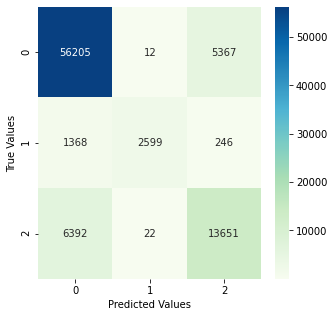

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test)
print("Evaluation metrics of logistic regression classifier: ", logreg.score(X_test, y_test))

conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)
print(classification_report(y_test, y_pred))

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,fmt=".0f",ax=ax, cmap=plt.cm.GnBu)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# Naive Bayes

Naive Bayes Classification Score: 0.8187556777154038


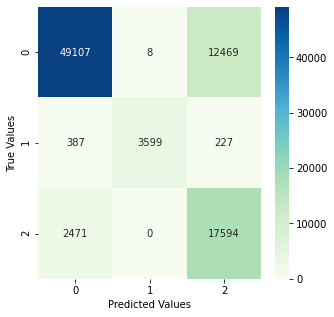

In [13]:
from sklearn.naive_bayes import GaussianNB


naive_bayes = GaussianNB()
naive_bayes.fit(X_test,y_test)
print("Naive Bayes Classification Score: {}".format(naive_bayes.score(X_test,y_test)))


y_pred = naive_bayes.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,fmt=".0f",ax=ax, cmap=plt.cm.GnBu)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# Decision Tree

Evaluation metrics of decision tree classifier: 
[[57650   391  3543]
 [  317  3750   146]
 [ 3522   146 16397]]
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     61584
         1.0       0.87      0.89      0.88      4213
         2.0       0.82      0.82      0.82     20065

    accuracy                           0.91     85862
   macro avg       0.88      0.88      0.88     85862
weighted avg       0.91      0.91      0.91     85862



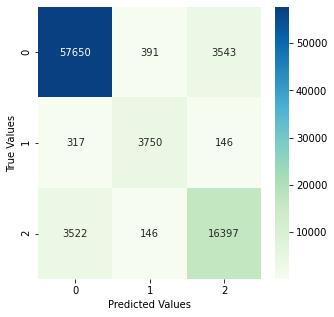

Sensitivity:  0.9932633827811375
Specificity:  0.922055569215638


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
 
y_pred_new = dtc.predict(X_test)
 

print("Evaluation metrics of decision tree classifier: ")
 
cm = confusion_matrix(y_test, y_pred_new)
print(cm)
print(classification_report(y_test, y_pred_new))
sens = cm[0,0] / (cm[0,0] + cm[0,1])
spec = cm[1,1] / (cm[1,0] + cm[1,1])

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt=".0f",ax=ax, cmap=plt.cm.GnBu)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

print("Sensitivity: ", sens)
print("Specificity: ", spec)

# K-Nearest Neighbors

Score for Number of Neighbors = 5: 0.8917215997763853


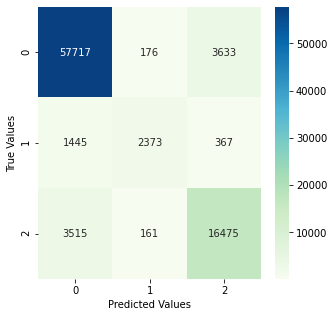

In [14]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
print("Score for Number of Neighbors = 5: {}".format(knn.score(X_test,y_test)))


y_pred = knn.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,fmt=".0f",ax=ax, cmap=plt.cm.GnBu)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# Support Vector Machine

In [15]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(X_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(X_test,y_test)))


y_pred = svm.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,fmt=".0f",ax=ax, cmap=plt.cm.GnBu)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

KeyboardInterrupt: ignored

# Artificial Neural Network

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

# Random Forest

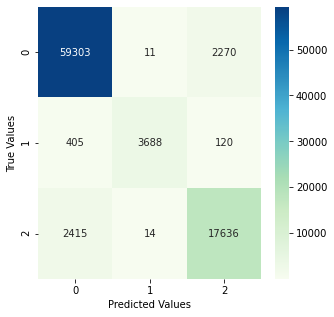

Evaluation metrics of random forest classifier:  0.9390300715100977 

Confusion Matrix: 
 [[59303    11  2270]
 [  405  3688   120]
 [ 2415    14 17636]] 

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     61584
         1.0       0.99      0.88      0.93      4213
         2.0       0.88      0.88      0.88     20065

    accuracy                           0.94     85862
   macro avg       0.94      0.91      0.92     85862
weighted avg       0.94      0.94      0.94     85862



In [17]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Instantiate
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

# Import confusion_matrix
from sklearn import metrics

y_pred = clf.predict(X_test)

score = metrics.accuracy_score(y_test, y_pred)

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True,fmt=".0f",ax=ax, cmap=plt.cm.GnBu)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

print("Evaluation metrics of random forest classifier: ", score,'\n')

print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))



*   ROC Curve
*   Bar plot for accuracy values

